### Bank Note Authentication

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

In [1]:
##Dataset Link: https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import sklearn

'1.0'

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\tisha\\anaconda3\\Lib\\site-packages\\~~learn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.



In [2]:
df=pd.read_csv('BankNote_Authentication.csv')

In [3]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

c:\users\tisha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\tisha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\tisha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

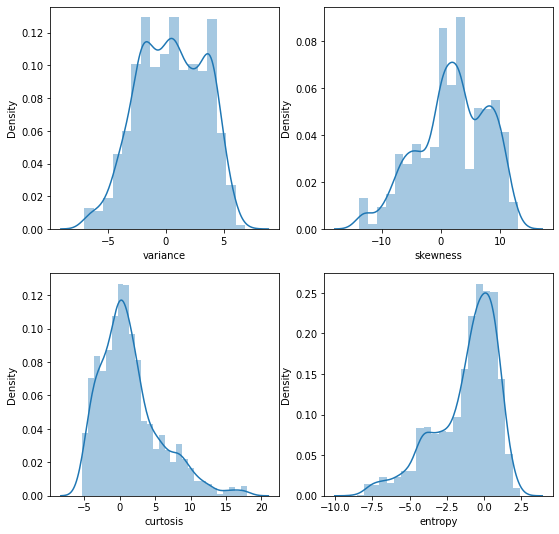

In [5]:
columns = ['variance','skewness','curtosis','entropy']

plot.figure(figsize=(9,9),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plot.subplot(2,2,plotnumber)
    sns.distplot(df[column])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

c:\users\tisha\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\tisha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\tisha\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\tisha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

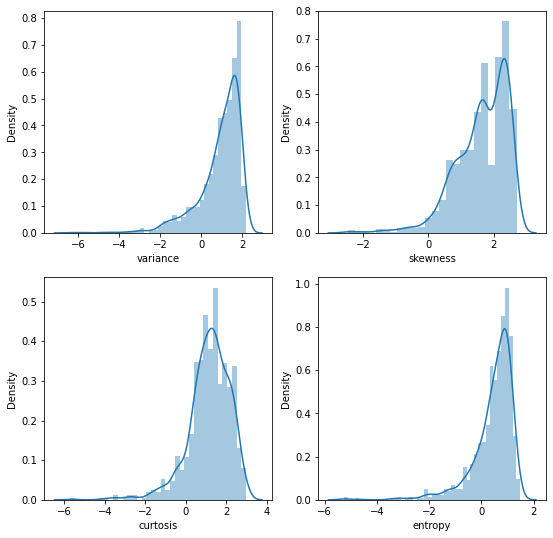

In [30]:
columns = ['variance','skewness','curtosis','entropy']

plot.figure(figsize=(9,9),facecolor='white')
plotnumber = 1

for column in columns:
    df[column]+=1
    ax = plot.subplot(2,2,plotnumber)
    sns.distplot(np.log(df[column]))
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()


c:\users\tisha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

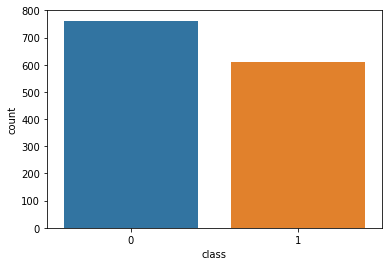

In [7]:
sns.countplot(df['class'])

In [8]:
x = df.drop(['class'],axis=1)
y = df['class']
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(x,y)

In [9]:
x_sampled.head()

,variance,skewness,curtosis,entropy
0,4.62160,9.6661,-1.8073,0.55301
1,5.54590,9.1674,-1.4586,-0.46210
2,4.86600,-1.6383,2.9242,1.10645
3,4.45660,10.5228,-3.0112,-2.59440
4,1.32924,-3.4552,5.5718,0.01120


In [10]:
y_sampled.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: class, dtype: int64

c:\users\tisha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

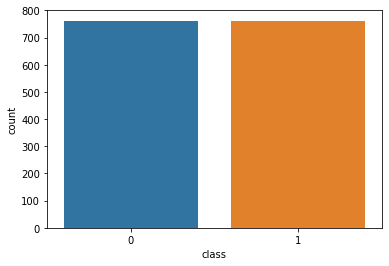

In [11]:
sns.countplot(y_sampled) 

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=1)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [14]:
### Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [15]:
## Prediction
y_pred=classifier.predict(x_test)

In [16]:
### Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [17]:
score

0.9934426229508196

In [17]:
from sklearn.metrics import classification_report
target=["Not Genuine","Genuine"]
print(classification_report(y_test,y_pred,target_names=target))

              precision    recall  f1-score   support

 Not Genuine       0.99      0.99      0.99       150
     Genuine       0.99      0.99      0.99       155

    accuracy                           0.99       305
   macro avg       0.99      0.99      0.99       305
weighted avg       0.99      0.99      0.99       305



In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [20]:
y_pred=knn.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [22]:
score

0.9967213114754099

In [23]:
from sklearn.metrics import classification_report
target=["Not Genuine","Genuine"]
print(classification_report(y_test,y_pred,target_names=target))

              precision    recall  f1-score   support

 Not Genuine       1.00      0.99      1.00       150
     Genuine       0.99      1.00      1.00       155

    accuracy                           1.00       305
   macro avg       1.00      1.00      1.00       305
weighted avg       1.00      1.00      1.00       305



In [19]:
grid_param={'n_estimators': [int(x) for x in np.linspace(20,80,10)],
             'max_features':["auto","sqrt"],
            'max_depth':[2],
            'min_samples_split':[2,5],
            'min_samples_leaf':[5,6,7,8],
            'bootstrap':[True]
                    }

In [20]:
### Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
randomForest=RandomForestClassifier()


In [21]:
from sklearn.model_selection import GridSearchCV
gr= GridSearchCV(estimator=randomForest,param_grid=grid_param, n_jobs=4,cv=5)
gr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True], 'max_depth': [2],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [5, 6, 7, 8],
                         'min_samples_split': [2, 5],
                         'n_estimators': [20, 26, 33, 40, 46, 53, 60, 66, 73,
                                          80]})

In [22]:
y_pred2=gr.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.9245901639344263

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

In [25]:
grid_param={'n_neighbors': [3,5,7,9],
             'weights' : ['uniform', 'distance']
                    }

In [26]:
from sklearn.model_selection import GridSearchCV
gr= GridSearchCV(estimator=knn,param_grid=grid_param, n_jobs=4,cv=5)
gr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [28]:
y_pred2=gr.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.9967213114754099

In [24]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(gr, pickle_out)
pickle_out.close()

In [25]:
gr.predict([[2,3,4,1]])

array([0], dtype=int64)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

{'n_neighbors': 3, 'weights': 'uniform'}

KNeighborsClassifier(n_neighbors=3, weights='distance')

0.9934426229508196

array([0], dtype=int64)